In [1]:
from utils import *
# Deactivate warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("data_W2023.csv")
df.columns = ["date", "USDCAD"]

In [3]:
df.head()

,date,USDCAD
0,01-Jan-1973,1.168677
1,01-Feb-1973,1.166112
2,01-Mar-1973,1.258816
3,01-Apr-1973,1.260858
4,01-May-1973,1.288661


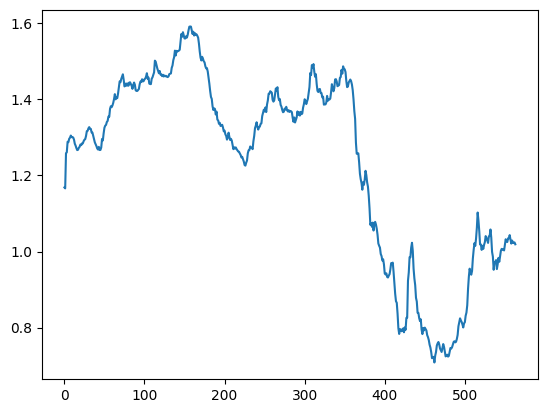

In [4]:
plt.plot(df["USDCAD"])

In [5]:
df = df[df["date"] < "2019-12-01"]

In [6]:
df.shape

(564, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 563
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    564 non-null    object 
 1   USDCAD  564 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.2+ KB


In [8]:
df["date"] = pd.to_datetime(df["date"])

In [9]:
df["log_100_USDCAD"] = np.log(100 * df["USDCAD"])

In [10]:
df.tail()

,date,USDCAD,log_100_USDCAD
559,2019-08-01,1.028977,4.633736
560,2019-09-01,1.023574,4.628470
561,2019-10-01,1.022401,4.627324
562,2019-11-01,1.024087,4.628971
563,2019-12-01,1.018995,4.623987


Text(0.5, 1.0, 'log 100 USDCAD=x')

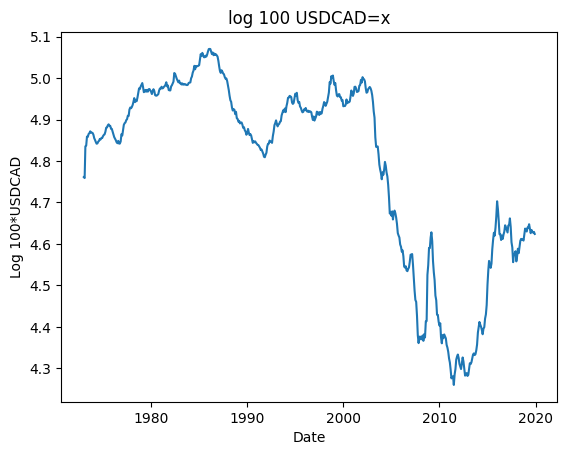

In [11]:
plt.plot(df["date"], df["log_100_USDCAD"])
plt.xlabel("Date")
plt.ylabel(f"Log 100*USDCAD")
plt.title("log 100 USDCAD=x")


In [12]:
#1b
T = df.shape[0]
T

564

In [13]:
trend = np.arange(1, T + 1)
ones = np.ones(T)

In [14]:
X = np.column_stack((ones, trend, trend ** 2))
X

array([[1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00],
       [1.00000e+00, 3.00000e+00, 9.00000e+00],
       ...,
       [1.00000e+00, 5.62000e+02, 3.15844e+05],
       [1.00000e+00, 5.63000e+02, 3.16969e+05],
       [1.00000e+00, 5.64000e+02, 3.18096e+05]])

In [15]:
Y = df["log_100_USDCAD"].values

In [16]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y

In [17]:
B

array([ 4.90909695e+00,  7.33070085e-04, -3.06987062e-06])

In [18]:
df["res"] = Y - X @ B

In [19]:
df

,date,USDCAD,log_100_USDCAD,res
0,1973-01-01,1.168677,4.761042,-0.148785
1,1973-02-01,1.166112,4.758845,-0.151705
2,1973-03-01,1.258816,4.835342,-0.075927
3,1973-04-01,1.260858,4.836962,-0.075018
4,1973-05-01,1.288661,4.858774,-0.053912
...,...,...,...,...
559,2019-08-01,1.028977,4.633736,0.276831
560,2019-09-01,1.023574,4.628470,0.274274
561,2019-10-01,1.022401,4.627324,0.275842
562,2019-11-01,1.024087,4.628971,0.280210


Text(0.5, 1.0, 'Determinist trend deviation')

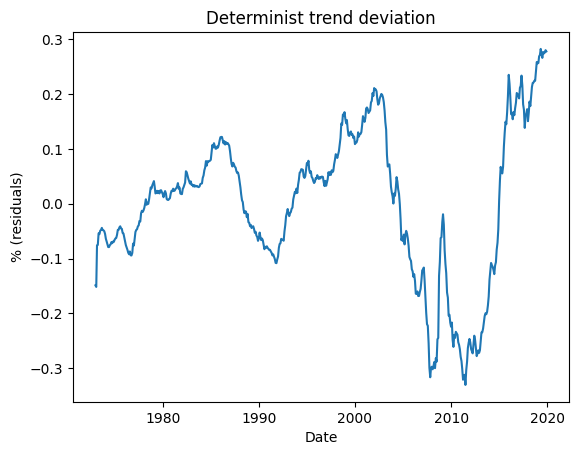

In [20]:
plt.plot(df["date"], df["res"])
plt.xlabel("Date")
plt.ylabel(f"% (residuals)")
plt.title("Determinist trend deviation")

In [21]:
#1c

df["stoch_USDCAD"] = df["log_100_USDCAD"].diff() * 100
df

,date,USDCAD,log_100_USDCAD,res,stoch_USDCAD
0,1973-01-01,1.168677,4.761042,-0.148785,NaN
1,1973-02-01,1.166112,4.758845,-0.151705,-0.219688
2,1973-03-01,1.258816,4.835342,-0.075927,7.649618
3,1973-04-01,1.260858,4.836962,-0.075018,0.162085
4,1973-05-01,1.288661,4.858774,-0.053912,2.181160
...,...,...,...,...,...
559,2019-08-01,1.028977,4.633736,0.276831,0.791843
560,2019-09-01,1.023574,4.628470,0.274274,-0.526515
561,2019-10-01,1.022401,4.627324,0.275842,-0.114658
562,2019-11-01,1.024087,4.628971,0.280210,0.164758


Text(0.5, 1.0, 'Hypothesis: stochastic trend')

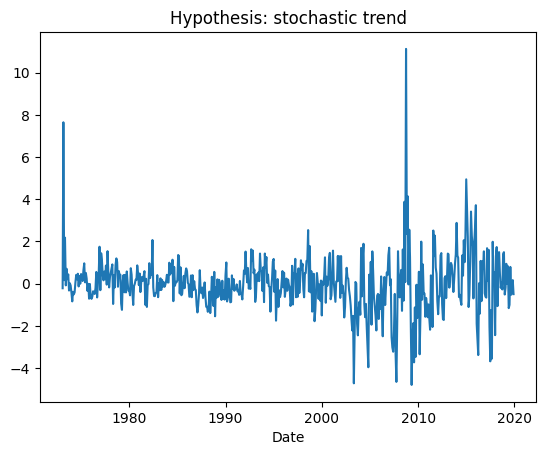

In [22]:
plt.plot(df["date"], df["stoch_USDCAD"])
plt.xlabel("Date")
plt.title("Hypothesis: stochastic trend")

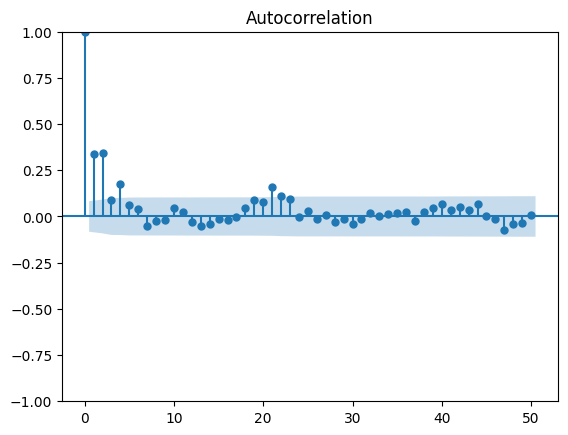

In [23]:
# 1d
sm.graphics.tsa.plot_acf(df["stoch_USDCAD"].dropna(), lags=50);


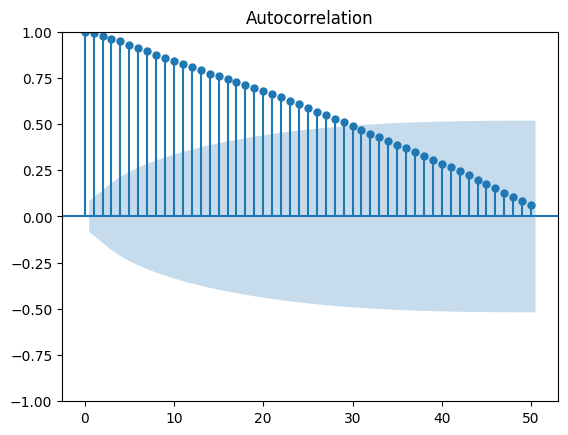

In [24]:
sm.graphics.tsa.plot_acf(df["res"].dropna(), lags=50);

In [25]:
#1e

sm.stats.acorr_ljungbox(df["stoch_USDCAD"].dropna(), lags=18)


,lb_stat,lb_pvalue
1,63.837877,1.350911e-15
2,130.932915,3.700656e-29
3,135.330291,3.838951e-29
4,153.014709,4.598552e-32
5,155.108804,1.090679e-31
6,156.108470,3.947901e-31
7,157.514338,1.069480e-30
8,157.903502,4.387614e-30
9,158.157909,1.792324e-29
10,159.368871,4.373649e-29


On remarque que les `lb_pvalues` (p-values pour le test de Ljung-Box) sont très faibles pour les lags 1 à 18. On peut donc rejeter l'hypothèse nulle d'absence de corrélation pour ces lags. On peut donc conclure que les résidus ne sont pas indépendants et que la série est autocorrélée.

# Partie 2. Choix du modèle (30 points)

Considérons les 8 modèles suivants :
- AR(1): $y_t = \delta + \phi_1 y_{t-1} + \epsilon_t$
- AR(2): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \epsilon_t$
- AR(3): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + \epsilon_t$
- AR(4): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + \phi_4 y_{t-4} + \epsilon_t$
- ARMA(1,1): $y_t = \delta + \phi_1 y_{t-1} - \theta_1 \epsilon_{t-1} + \epsilon_t$
- ARMA(2,2): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} + \epsilon_t$
- ARMA(3,3): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \theta_3 \epsilon_{t-3} + \epsilon_t$
- ARMA(4,4): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + \phi_4 y_{t-4} - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \theta_3 \epsilon_{t-3} - \theta_4 \epsilon_{t-4} + \epsilon_t$

In [33]:
def check_stationnarity(arma_model: ARIMAResultsWrapper) -> bool:
    arroots = arma_model.arroots
    return np.all(np.sqrt(arroots.real + arroots.imag) < 1)

In [26]:
order_list = [([1], 0, [0]),
               ([1, 2], 0, [0]),
               ([1, 2, 3], 0, [0]),
               ([1, 2, 3, 4], 0, [0]),
               ([1], 0, [1]),
               ([1, 2], 0, [1, 2]),
               ([1, 2, 3], 0, [1, 2, 3]),
               ([1, 2, 3, 4], 0, [1, 2, 3, 4])]

In [27]:
arma_models = {}

for order in order_list:
    print(f"Autoregressive lags: {order[0]}")
    print(f"Moving average lags: {order[2]}")

    model = ARIMA(df["stoch_USDCAD"].dropna(), order=order)
    results = model.fit()
    print(results.summary())

    arma_models[f"ARMA({order[0][-1]},{order[2][-1]})"] = results


Autoregressive lags: [1]
Moving average lags: [0]
                               SARIMAX Results                                
Dep. Variable:           stoch_USDCAD   No. Observations:                  563
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -919.472
Date:                Sun, 12 Feb 2023   AIC                           1844.945
Time:                        13:55:11   BIC                           1857.945
Sample:                             0   HQIC                          1850.020
                                - 563                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0249      0.086     -0.291      0.771      -0.193       0.143
ar.L1          0.3353      0.031     10.804      0.000       0.274       0.396
si

In [28]:
def compute_lr_statistic(reduced_ll: float, full_ll: float) -> float:
    return -2 * (reduced_ll - full_ll)

In [29]:
def compute_p_value_llr(reduced_ll: float, full_ll: float, df: int = 1) -> float:
    lr_statistic = compute_lr_statistic(reduced_ll, full_ll)
    p_val = sp.stats.chi2.sf(lr_statistic, df=df)
    return p_val

In [30]:
arma_models["ARMA(4,4)"].arroots


array([-1.27044227-0.j        ,  0.58783978-0.83721156j,
        0.58783978+0.83721156j,  1.83290223-0.j        ])

- H0: Le modèle complet ARMA(4,4) fit les données aussi bien que le modèle réduit ARMA(3,3). Par conséquent, on devrait choisir le modèle ARMA(3,3) car il est plus simple.
- H1: Le modèle complet ARMA(4,4) fit mieux les données que le modèle réduit ARMA(3,3). Par conséquent, on devrait choisir le modèle ARMA(4,4) car il est plus précis.



In [31]:
compute_p_value_llr(arma_models["ARMA(3,3)"].llf,
                    arma_models["ARMA(4,4)"].llf,
                    df=2)

0.28949106543462216

In [32]:
print(arma_models["ARMA(4,4)"].arroots)

[-1.27044227-0.j          0.58783978-0.83721156j  0.58783978+0.83721156j
  1.83290223-0.j        ]
